In [0]:
import numpy as np

def nonlin(x,deriv=False):
  if(deriv==False):
    return x*(1-x)
  return 1/(1+np.exp(-x))

X=np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])
y=np.array([[0,0,1,1]]).T

In [0]:
np.random.seed(1)
syn0=2*np.random.random((3,1))-1
syn1=2*syn0-1
iter=0
syn0_history=[syn0]
syn1_history=[syn1]

In [5]:
for iter in range(10000):
  l0=X
  l1=nonlin(np.dot(l0,syn0))
  l1_error=y=l1
  l1_delta=l1_error*nonlin(l1,True)

  l2=nonlin(np.dot(l0,syn1))
  l2_error=y-l2
  l2_delta=l2_error*nonlin(l2,True)

  syn0+=np.dot(l0.T,l1_delta)
  syn1+=np.dot(l0.T,l2_delta)

print('Output After Training:')
print('L1:',l1)
print('\n')
print('L2:',l2)

Output After Training:
L1: [[-13.83369934]
 [-16.53957076]
 [-19.18698724]
 [-22.34502287]]


L2: [[-12.46138853]
 [-13.61676591]
 [-23.73266604]
 [-25.31027711]]


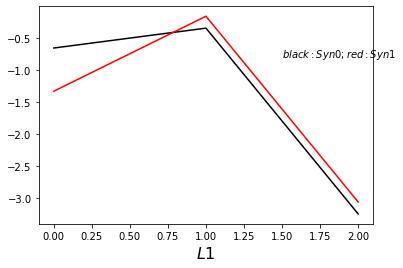

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(syn0_history[0],ms=3,lw=1.5,color='black')
plt.plot(syn1_history[0],ms=3,lw=1.5,color='red')
plt.xlabel(r'$L1$',fontsize=16)
plt.text(1.5,-0.8,r'$black: Syn0; red: Syn1$')
plt.show()